In [ ]:
cumberland county maine

In [1]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [2]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
61580,4/15/2020,Windham,Vermont,50025.0,58,1
550180,9/19/2020,Lavaca,Texas,48285.0,712,34
147955,5/15/2020,Henry,Virginia,51089.0,30,1
542484,9/17/2020,Henry,Missouri,29083.0,151,4
470055,8/26/2020,Denver,Colorado,8031.0,11021,426


In [3]:
# find sd county
cumber = counties[(counties['county']=='Cumberland') & (counties['state']=='Maine')]
cumber.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
cumber['datetime'] = pd.to_datetime(cumber['date'])

In [5]:
#san_diego['datetime'] = pd.to_datetime(san_diego['date'])
#san_diego

cumber.sort_values(by = 'datetime')
cumber = cumber.reset_index()

# Groupby to consolidate cases by entire region
cumber = cumber.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
cumber.sort_values(by = 'datetime')
cumber = cumber.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
cumber['datetime'] = pd.to_datetime(cumber['datetime'])
cumber['day'] = cumber['datetime'].map(lambda x: x.day)
cumber['month'] = cumber['datetime'].map(lambda x: x.month)
cumber['year'] = cumber['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    #us['growth_rate'] = us['cases'].pct_change()
    # Drop null value
cumber = cumber.dropna()
cumber = cumber

In [6]:
cumber['new_deaths'] = cumber['deaths'].diff()

In [18]:
cumber['new_deaths'] = cumber['new_deaths'].fillna(0)

In [ ]:
cumber.tail(30)


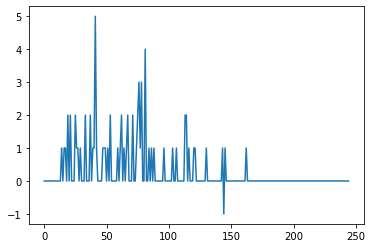

In [19]:
# plot new deaths
cumber['new_deaths'].plot()

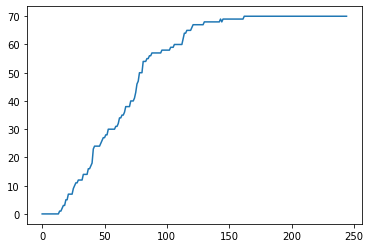

In [13]:
cumber['deaths'].plot()

In [21]:
def make_models():
    ''' function to run deaths model'''
    # Make the model
    cumber_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = cumber[["day", "month", "year"]]
    y_Us = cumber[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    cumber_model.fit(X_train_Us, y_train_Us)
    cumber_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = cumber_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,90.124250
1,27,11,2020,2020-11-27,92.703957
2,4,12,2020,2020-12-04,93.319650
3,11,12,2020,2020-12-11,95.899357
4,18,12,2020,2020-12-18,98.479063
5,25,12,2020,2020-12-25,101.058770


In [26]:
weeks_deaths = make_models()

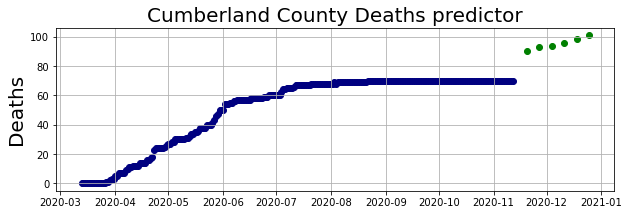

In [28]:
 #Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(weeks_deaths['datetime'],weeks_deaths['predicted_deaths'],c='g',)
plt.scatter(cumber['datetime'],cumber['deaths'],c='#000080',)
plt.grid(True)
plt.title('Cumberland County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()